# Fake news classification

### Importing required library

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import re
import string

### Load the fake and real dataset

In [4]:
df_fake = pd.read_csv("Fake.csv")
df_true = pd.read_csv("True.csv")

In [5]:
df_fake.head(5)

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [6]:
df_fake.shape

(23481, 4)

In [7]:
df_true.head(5)

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [8]:
df_true.shape

(21417, 4)

Inserting a column called "class" for fake and real news dataset to categories fake and true news. 

In [9]:
df_fake["class"] = 0
df_true["class"] = 1

Removing last 10 rows from both the dataset, for manual testing  

In [10]:
df_fake.shape, df_true.shape

((23481, 5), (21417, 5))

In [11]:
df_fake_manual_testing = df_fake.tail(10)
for i in range(23480,23470,-1):
    df_fake.drop([i], axis = 0, inplace = True)
df_true_manual_testing = df_true.tail(10)
for i in range(21416,21406,-1):
    df_true.drop([i], axis = 0, inplace = True)

In [12]:
df_fake.shape, df_true.shape

((23471, 5), (21407, 5))

Merging the manual testing dataframe in single dataset and save it in a csv file

In [13]:
df_fake_manual_testing["class"] = 0
df_true_manual_testing["class"] = 1

<ipython-input-13-3aaf8ec2aad1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fake_manual_testing["class"] = 0
<ipython-input-13-3aaf8ec2aad1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_true_manual_testing["class"] = 1


In [14]:
df_fake_manual_testing.head(10)

,title,text,subject,date,class
23471,Seven Iranians freed in the prisoner swap have...,"21st Century Wire says This week, the historic...",Middle-east,"January 20, 2016",0
23472,#Hashtag Hell & The Fake Left,By Dady Chery and Gilbert MercierAll writers ...,Middle-east,"January 19, 2016",0
23473,Astroturfing: Journalist Reveals Brainwashing ...,Vic Bishop Waking TimesOur reality is carefull...,Middle-east,"January 19, 2016",0
23474,The New American Century: An Era of Fraud,Paul Craig RobertsIn the last years of the 20t...,Middle-east,"January 19, 2016",0
23475,Hillary Clinton: ‘Israel First’ (and no peace ...,Robert Fantina CounterpunchAlthough the United...,Middle-east,"January 18, 2016",0
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",0
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",0
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",0
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",0
23480,10 U.S. Navy Sailors Held by Iranian Military ...,21st Century Wire says As 21WIRE predicted in ...,Middle-east,"January 12, 2016",0


In [15]:
df_true_manual_testing.head(10)

,title,text,subject,date,class
21407,"Mata Pires, owner of embattled Brazil builder ...","SAO PAULO (Reuters) - Cesar Mata Pires, the ow...",worldnews,"August 22, 2017",1
21408,"U.S., North Korea clash at U.N. forum over nuc...",GENEVA (Reuters) - North Korea and the United ...,worldnews,"August 22, 2017",1
21409,"U.S., North Korea clash at U.N. arms forum on ...",GENEVA (Reuters) - North Korea and the United ...,worldnews,"August 22, 2017",1
21410,Headless torso could belong to submarine journ...,COPENHAGEN (Reuters) - Danish police said on T...,worldnews,"August 22, 2017",1
21411,North Korea shipments to Syria chemical arms a...,UNITED NATIONS (Reuters) - Two North Korean sh...,worldnews,"August 21, 2017",1
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",1
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",1
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",1
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",1
21416,Indonesia to buy $1.14 billion worth of Russia...,JAKARTA (Reuters) - Indonesia will buy 11 Sukh...,worldnews,"August 22, 2017",1


In [17]:
df_manual_testing = pd.concat([df_fake_manual_testing,df_true_manual_testing], axis = 0)
df_manual_testing.to_csv("manual_testing.csv")

Merging the main fake and true dataframe

In [18]:
df_marge = pd.concat([df_fake, df_true], axis =0 )
df_marge.head(10)

,title,text,subject,date,class
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0
5,Racist Alabama Cops Brutalize Black Boy While...,The number of cases of cops brutalizing and ki...,News,"December 25, 2017",0
6,"Fresh Off The Golf Course, Trump Lashes Out A...",Donald Trump spent a good portion of his day a...,News,"December 23, 2017",0
7,Trump Said Some INSANELY Racist Stuff Inside ...,In the wake of yet another court decision that...,News,"December 23, 2017",0
8,Former CIA Director Slams Trump Over UN Bully...,Many people have raised the alarm regarding th...,News,"December 22, 2017",0
9,WATCH: Brand-New Pro-Trump Ad Features So Muc...,Just when you might have thought we d get a br...,News,"December 21, 2017",0


In [19]:
df_marge.columns

Index(['title', 'text', 'subject', 'date', 'class'], dtype='object')

#### "title",  "subject" and "date" columns is not required for detecting the fake news, so I am going to drop the columns.

In [20]:
df = df_marge.drop(["title", "subject","date"], axis = 1)

In [21]:
df.isnull().sum()

text     0
class    0
dtype: int64

#### Randomly shuffling the dataframe 

In [22]:
df = df.sample(frac = 1)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44878 entries, 8111 to 795
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    44878 non-null  object
 1   class   44878 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 1.0+ MB


E:\Anaconda_Env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='class', ylabel='count'>

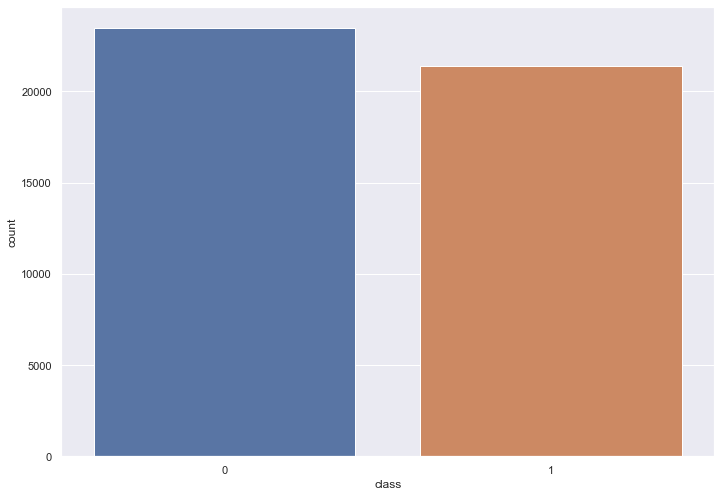

In [24]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.countplot(df['class'])

In [25]:
df.reset_index(inplace = True)
df.drop(["index"], axis = 1, inplace = True)

In [26]:
df.columns

Index(['text', 'class'], dtype='object')

In [27]:
df.head()

,text,class
0,"One way or another, the passing of Supreme Cou...",0
1,ABUJA (Reuters) - Nigeria s armed forces said ...,1
2,During a discussion about sexual harassment ch...,0
3,(Reuters) - Hurricane Irma swept over U.S. Pre...,1
4,Dining and dancing giving Kenya one billion do...,0


#### Creating a function to convert the text in lowercase, remove the extra space, special chr., ulr and links.

In [28]:
def wordopt(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub("\\W"," ",text) 
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)    
    return text

In [29]:
df["text"] = df["text"].apply(wordopt)

#### Defining dependent and independent variable as x and y

In [30]:
x = df["text"]
y = df["class"]
print('x__________',x)
print('y__________',y)

x__________ 0        one way or another  the passing of supreme cou...
1        abuja  reuters    nigeria s armed forces said ...
2        during a discussion about sexual harassment ch...
3         reuters    hurricane irma swept over u s  pre...
4        dining and dancing giving kenya one billion do...
                               ...                        
44873    london  reuters    britain s parliament will n...
44874    berlin  reuters    more than   police will be ...
44875    washington  reuters    the top u s  house of r...
44876    beijing  reuters    china said on tuesday it h...
44877    washington  reuters    u s  commerce secretary...
Name: text, Length: 44878, dtype: object
y__________ 0        0
1        1
2        0
3        1
4        0
        ..
44873    1
44874    1
44875    1
44876    1
44877    1
Name: class, Length: 44878, dtype: int64


#### Splitting the dataset into training set and testing set. 

In [31]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((33658,), (33658,), (11220,), (11220,))

In [32]:
x_train

21148    lisbon  reuters    a women s rights group has ...
25221    washington  reuters    the no   republican in ...
7256     paris  reuters    president emmanuel macron s ...
20967     so much winning   were  going to be winning s...
6653      century wire says one of the biggest trends r...
                               ...                        
19724    phnom penh  reuters    cambodian prime ministe...
32611    if you watched the second presidential debate ...
40958    washington  reuters    u s  republican preside...
29680    washington  reuters    the white house express...
40400    washington  reuters    members of the u s   ho...
Name: text, Length: 33658, dtype: object

#### Convert text to vectors

In [33]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [34]:
vectorization = TfidfVectorizer()
xv_train = vectorization.fit_transform(x_train)
xv_test = vectorization.transform(x_test)

In [73]:
print(xv_train.shape)
print(xv_train)


(33658, 94977)
  (0, 339)	0.01634757952829144
  (0, 895)	0.04470687078634235
  (0, 1143)	0.1014810500183033
  (0, 1144)	0.1014810500183033
  (0, 1145)	0.17929616038114468
  (0, 1448)	0.021722457131787193
  (0, 2316)	0.018376419040773105
  (0, 2558)	0.036866043964828565
  (0, 2592)	0.04764318948984686
  (0, 2677)	0.03768846644170684
  (0, 3065)	0.028267933170457733
  (0, 3167)	0.10554354872810431
  (0, 3681)	0.05718317181466077
  (0, 3874)	0.09311159828132244
  (0, 4110)	0.10546607058787318
  (0, 4240)	0.014908550482967894
  (0, 4863)	0.05883159636402371
  (0, 5180)	0.03332154390285321
  (0, 5181)	0.043441559160380096
  (0, 5184)	0.06385212853180716
  (0, 7216)	0.01369761389229222
  (0, 7419)	0.016810055637486866
  (0, 8119)	0.06617067446424393
  (0, 8268)	0.179744107749694
  (0, 8838)	0.05307843880245537
  :	:
  (33657, 81113)	0.04251332878753713
  (33657, 83600)	0.09110466758808879
  (33657, 83607)	0.08017659176934096
  (33657, 83771)	0.05528946461574642
  (33657, 83800)	0.24748800163

### 1. Logistic Regression

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report

In [37]:
LR = LogisticRegression()
LR.fit(xv_train,y_train)

LogisticRegression()

In [38]:
pred_lr=LR.predict(xv_test)

In [39]:
LR.score(xv_test, y_test)

0.9877896613190731

In [40]:
print("Accuracy of Logistic Regression Classifier: {}%".format(round(accuracy_score(y_test, pred_lr)*100,2)))
print("\nConfusion Matrix of Logistic Regression Classifier:\n")
print(confusion_matrix(y_test, pred_lr))
print("\nCLassification Report of Logistic Regression Classifier:\n")
print(classification_report(y_test, pred_lr))

Accuracy of Logistic Regression Classifier: 98.78%

Confusion Matrix of Logistic Regression Classifier:

[[5907   75]
 [  62 5176]]

CLassification Report of Logistic Regression Classifier:

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5982
           1       0.99      0.99      0.99      5238

    accuracy                           0.99     11220
   macro avg       0.99      0.99      0.99     11220
weighted avg       0.99      0.99      0.99     11220



### 2. Decision Tree Classification

In [41]:
from sklearn.tree import DecisionTreeClassifier

In [42]:
DT = DecisionTreeClassifier()
DT.fit(xv_train, y_train)

DecisionTreeClassifier()

In [43]:
pred_dt = DT.predict(xv_test)

In [44]:
DT.score(xv_test, y_test)

0.9967023172905526

In [45]:
print("Accuracy of Decision Tree Classifier: {}%".format(round(accuracy_score(y_test, pred_dt)*100,2)))
print("\nConfusion Matrix of Logistic Regression Classifier:\n")
print(confusion_matrix(y_test, pred_dt))
print("\nCLassification Report of Decision Tree Classifier:\n")
print(classification_report(y_test, pred_dt))

Accuracy of Decision Tree Classifier: 99.67%

Confusion Matrix of Logistic Regression Classifier:

[[5959   23]
 [  14 5224]]

CLassification Report of Decision Tree Classifier:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5982
           1       1.00      1.00      1.00      5238

    accuracy                           1.00     11220
   macro avg       1.00      1.00      1.00     11220
weighted avg       1.00      1.00      1.00     11220



In [46]:
print((5841+5330)/(5841+5330+28+21)*100)

99.5632798573975


### 3. Gradient Boosting Classifier

In [47]:
from sklearn.ensemble import GradientBoostingClassifier

In [48]:
GBC = GradientBoostingClassifier(random_state=0)
GBC.fit(xv_train, y_train)

GradientBoostingClassifier(random_state=0)

In [49]:
pred_gbc = GBC.predict(xv_test)

In [50]:
GBC.score(xv_test, y_test)

0.9962566844919786

In [51]:
print("Accuracy of Gradient Boosting Classifier: {}%".format(round(accuracy_score(y_test, pred_gbc)*100,2)))
print("\nConfusion Matrix of Gradient Boosting Classifier:\n")
print(confusion_matrix(y_test, pred_gbc))
print("\nCLassification Report of Gradient Boosting Classifier:\n")
print(classification_report(y_test, pred_gbc))

Accuracy of Gradient Boosting Classifier: 99.63%

Confusion Matrix of Gradient Boosting Classifier:

[[5949   33]
 [   9 5229]]

CLassification Report of Gradient Boosting Classifier:

              precision    recall  f1-score   support

           0       1.00      0.99      1.00      5982
           1       0.99      1.00      1.00      5238

    accuracy                           1.00     11220
   macro avg       1.00      1.00      1.00     11220
weighted avg       1.00      1.00      1.00     11220



### 4. Random Forest Classifier

In [52]:
from sklearn.ensemble import RandomForestClassifier

In [53]:
RFC = RandomForestClassifier(random_state=0)
RFC.fit(xv_train, y_train)

RandomForestClassifier(random_state=0)

In [54]:
pred_rfc = RFC.predict(xv_test)

In [55]:
RFC.score(xv_test, y_test)

0.9901069518716578

In [56]:
print("Accuracy of Random Forest Classifier Classifier: {}%".format(round(accuracy_score(y_test, pred_rfc)*100,2)))
print("\nConfusion Matrix of Random Forest Classifier Classifier:\n")
print(confusion_matrix(y_test, pred_rfc))
print("\nCLassification Report of Random Forest Classifier Classifier:\n")
print(classification_report(y_test, pred_rfc))

Accuracy of Random Forest Classifier Classifier: 99.01%

Confusion Matrix of Random Forest Classifier Classifier:

[[5934   48]
 [  63 5175]]

CLassification Report of Random Forest Classifier Classifier:

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5982
           1       0.99      0.99      0.99      5238

    accuracy                           0.99     11220
   macro avg       0.99      0.99      0.99     11220
weighted avg       0.99      0.99      0.99     11220



# Model Testing With Manual Entry

### News

In [57]:
def output_lable(n):
    if n == 0:
        return "Fake News"
    elif n == 1:
        return "Not A Fake News"
    
def manual_testing(news):
    testing_news = {"text":[news]}
    new_def_test = pd.DataFrame(testing_news)
    new_def_test["text"] = new_def_test["text"].apply(wordopt) 
    new_x_test = new_def_test["text"]
    new_xv_test = vectorization.transform(new_x_test)
    pred_LR = LR.predict(new_xv_test)
    pred_DT = DT.predict(new_xv_test)
    pred_GBC = GBC.predict(new_xv_test)
    pred_RFC = RFC.predict(new_xv_test)

    return print("\n\nLR Prediction: {} \nDT Prediction: {} \nGBC Prediction: {} \nRFC Prediction: {}".format(output_lable(pred_LR[0]), 
                                                                                                              output_lable(pred_DT[0]), 
                                                                                                              output_lable(pred_GBC[0]), 
                                                                                                              output_lable(pred_RFC[0])))

In [75]:
news = str(input())
manual_testing(news)

AG asks Punjab to form board on Nawaz’s health


LR Prediction: Fake News 
DT Prediction: Fake News 
GBC Prediction: Fake News 
RFC Prediction: Fake News
